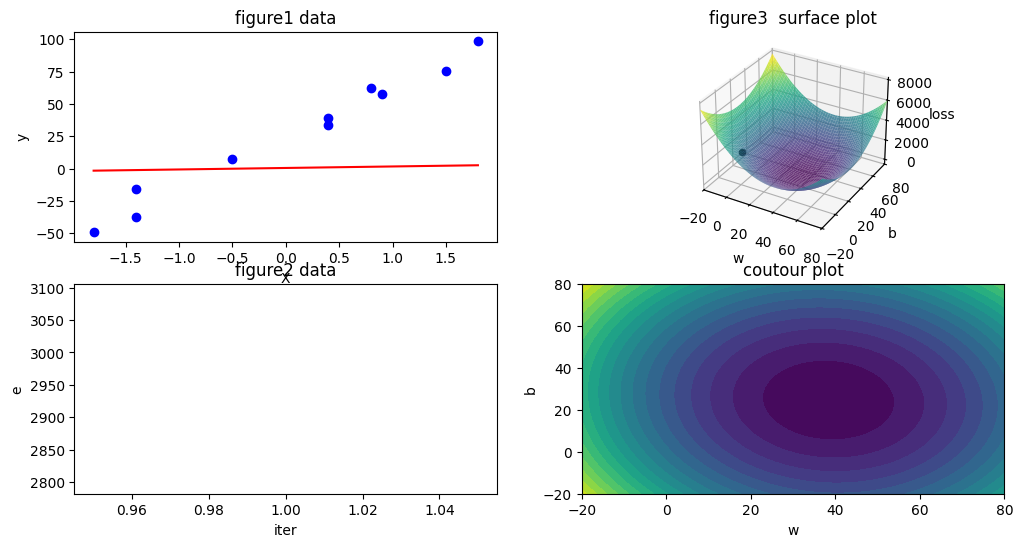

In [3]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec   # gridspec 用于自定义网格布局

# -------------------------
# 1. 数据准备：散点输入
# -------------------------

data = [[-0.5, 7.7],
        [1.8, 98.5],
        [0.9, 57.8],
        [0.4, 39.2],
        [-1.4, -15.7],
        [-1.4, -37.3],
        [-1.8, -49.1],
        [1.5, 75.6],
        [0.4, 34],
        [0.8, 62.3]]

# 转成 numpy 数组，便于后续的矩阵运算
data = np.array(data)

# 按列提取 x 和 y
# data[:,0] 代表第一列 → x 值
# data[:,1] 代表第二列 → y 值
x_data = data[:, 0]
y_data = data[:, 1]

# -------------------------
# 2. 参数初始化
# -------------------------

w = 0   # 权重（斜率）
b = 0   # 偏置（截距）

learning_rate = 0.01  # 超参数：学习率，控制每次参数更新幅度

# -------------------------
# 3. 损失函数（均方误差 MSE）
# -------------------------

def loss_function(x_data,  # 输入数据的 x（自变量）
                  y_data,  # 输入数据的 y（真实值 / 标签）
                  w,       # 参数：权重（斜率）
                  b        # 参数：偏置（截距）
                 ):
    """
    使用均方误差（MSE）计算线性回归模型的损失值。
    即：Loss = mean( (真实值 - 预测值)^2 )
    """

    # 预测值计算：
    # np.dot(x_data, w) 表示所有 x 与 w 做点积（线性模型）
    # 加上偏置 b 得到预测结果 predicted
    predicted = np.dot(x_data, w) + b

    # 均方误差 MSE：
    # (y_data - predicted)**2 → 每个样本点的误差平方
    # np.mean(...) → 所有误差平方的平均值
    total_loss = np.mean((y_data - predicted) ** 2)

    # 返回标量损失，用于衡量当前 w,b 的好坏
    return total_loss


# ==========================================================
# 下面开始画图（这部分不做注释，按你的要求保持原样）
# ==========================================================

fig = plt.figure("show figure", figsize=(12, 6))
gs = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('figure1 data')

ax2 = fig.add_subplot(gs[1, 0])
ax2.set_xlabel('iter')
ax2.set_ylabel('e')
ax2.set_title('figure2 data')

ax3=fig.add_subplot(gs[0,1],projection='3d')
w_values = np.linspace(-20, 80, 100)
b_values = np.linspace(-20, 80, 100)
W, B = np.meshgrid(w_values, b_values)
loss_values=np.zeros_like(W)

for i ,w_value in enumerate(w_values):
    for j, b_value in enumerate(b_values):
        loss_values[j, i] = loss_function(x_data, y_data, w_value, b_value)

ax3.plot_surface(W, B, loss_values, cmap='viridis', alpha=0.8)
ax3.set_xlabel('w')
ax3.set_ylabel('b')
ax3.set_zlabel('loss')
ax3.set_title('figure3  surface plot')

ax4 = fig.add_subplot(gs[1, 1])
ax4.set_xlabel('w')
ax4.set_ylabel('b')
ax4.set_title('coutour plot')
ax4.contourf(W, B, loss_values, levels=20, cmap='viridis')


# ==========================================================
# 迭代训练（梯度下降部分）：你要求注释的重点
# ==========================================================

num_iterations = 100  # 梯度下降的迭代次数

iter_loss_list = []   # 存储每轮损失值，用作绘制损失下降曲线
iter_num_list = []    # 存储迭代轮数
gd_path = []          # 存储每次 (w,b) 的位置，用于 3D 轨迹显示

for n in range(1, num_iterations + 1):

    gd_path.append((w, b))  # 保存当前参数点，用于轨迹图

    # -------- 前向传播：计算预测值 --------
    y_pre = np.dot(x_data, w) + b

    # -------- 计算当前损失 --------
    e = np.mean((y_data - y_pre) ** 2)

    iter_loss_list.append(e)   # 保存损失
    iter_num_list.append(n)    # 保存迭代次数

    # -------- 反向传播：计算梯度 --------
    # 梯度公式（对 w 求偏导）：
    # dL/dw = -2/N * (y - y_pre) dot x_data
    gradient_w = (-2 * (y_data - y_pre).dot(x_data)) / len(x_data)

    # 梯度公式（对 b 求偏导）：
    # dL/db = -2/N * sum(y - y_pre)
    gradient_b = np.mean(-2 * (y_data - y_pre))

    # -------- 更新参数：梯度下降 --------
    w = w - learning_rate * gradient_w
    b = b - learning_rate * gradient_b

    # -------- 显示更新（画图相关，保持不注释）--------
    frequence_display = 10
    if n % frequence_display == 0 or n == 1:
        ax1.clear()
        ax1.set_xlabel('X')
        ax1.set_ylabel('y')
        ax1.set_title('figure1 data')
        ax1.scatter(x_data, y_data, color='b')
        x_min, x_max = x_data.min(), x_data.max()
        y_min, y_max = w * x_min + b, w * x_max + b
        ax1.plot([x_min, x_max], [y_min, y_max], color='r')
        
        ax2.clear()
        ax2.set_xlabel('iter')
        ax2.set_ylabel('e')
        ax2.set_title('figure2 data')
        ax2.plot(iter_num_list, iter_loss_list, color='g')

        if len(gd_path) > 0:
            gd_w, gd_b = zip(*gd_path)
            ax3.plot(gd_w, gd_b,
                    [loss_function(x_data, y_data, np.array(gd_w[i]), np.array(gd_b[i])) for i in range(len(gd_w))],
                    color='black')
            ax3.set_xlim(-20, 80)
            ax3.set_ylim(-20, 80)
            ax3.set_xlabel('w')
            ax3.set_ylabel('b')
            ax3.set_zlabel('loss')
            ax3.set_title('figure3  surface plot')
            ax3.scatter(w, b, loss_function(x_data, y_data, w, b), c='black', s=20)

            ax4.plot(gd_w, gd_b)

        plt.pause(1)


In [1]:
# tensor 是什么
import torch

""" 01
-------------------打印标量 向量  矩阵 
"""

# 打印一个标量
# 比如3.14
scalar_tensor = torch.tensor(3.14)
print("scalar_tenser", scalar_tensor)

# 打印一个向量
vector_tensor = torch.tensor([1, 2, 3, 4, 5])
print("vector_tensor", vector_tensor)

# 打印一个矩阵
matrix_tensor = torch.tensor([[1, 2], [3, 4]])
print("matrix_tensor", matrix_tensor)

scalar_tenser tensor(3.1400)
vector_tensor tensor([1, 2, 3, 4, 5])
matrix_tensor tensor([[1, 2],
        [3, 4]])


In [19]:
import torch

"""
02
tensor的存储
"""
# 打印一下tensor的信息，包括 形状、步长、存储偏移量 设备等信息
# 做一个2*3 的张量
tensor_2_3 = torch.tensor([[1, 2, 3], [4, 5, 6]])
# 打印一下这个张量
print(tensor_2_3)
# 打印数据类型
print(tensor_2_3[0][1])
print("tensor_2_3[0][1].type",tensor_2_3[0][1].type)

# 元数据
print("=== tensor metadata ===")

# 直接打印张量本身：
# 可以看到张量的数值排布情况（行、列结构）
print("tensor:", tensor_2_3)


# shape（形状）：
# 返回张量的维度大小，如 (2,3) 表示 2 行 3 列。
# 本质是告诉你：这个 Tensor 的“数学维度结构”是什么。
print("shape:", tensor_2_3.shape)


# dtype（数据类型）：
# 表示每个元素使用什么数据类型，如 int64、float32。
# 在深度学习中 dtype 会影响运算速度和显存占用。
print("dtype:", tensor_2_3.dtype)


# device（设备）：
# 表示张量是放在 CPU 还是 GPU 上。
# 如果是 GPU，通常显示为 cuda:0。
print("device:", tensor_2_3.device)


# stride（步长）：
# stride 的含义是：在某一维度上移动 1 个元素时，在底层 storage 中要跨越多少步。
# 对一个 (2,3) 的矩阵，stride = (3,1)
# 代表：
#   向下移动一行 → 跨越 3 个元素
#   向右移动一列 → 跨越 1 个元素
# stride 决定怎样从底层一维 storage 映射出二维结构。
print("stride:", tensor_2_3.stride())


# storage（底层存储对象）：
# PyTorch 的 Tensor 底层数据全部放在一个连续的一维“存储区”里，
# 这个 storage 就是那个真正存放数据的地方。
# 多维 Tensor 只是对这个一维 storage 的“视图”。
print("storage:", tensor_2_3.storage())


# storage data（storage 的内部真实数据列表版）：
# 这里把 storage 转成 Python 列表，方便查看底层真实数据。
# 你会看到最底层永远是一维的。
print("storage data:", tensor_2_3.storage().tolist())


# storage_offset（存储偏移量）：
# 表示 Tensor 的第一个元素在 storage 中的起始位置。
# 例如：
#   原 tensor → offset = 0
#   切片 tensor_2_3[:, 1:] → offset = 1，因为切掉第一列后，视图从第二个项目开始
print("storage offset:", tensor_2_3.storage_offset())


# is_contiguous（是否连续存储）：
# 判断张量在底层 storage 中的数据是否按顺序连续排列。
# 对 transpose() 转置后的张量通常是 False。
# 非连续张量在运算前通常需要 .contiguous() 变成连续存储。
print("is_contiguous:", tensor_2_3.is_contiguous())

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor(2)
tensor_2_3[0][1].type <built-in method type of Tensor object at 0x000002B8BCD8D1F0>
=== tensor metadata ===
tensor: tensor([[1, 2, 3],
        [4, 5, 6]])
shape: torch.Size([2, 3])
dtype: torch.int64
device: cpu
stride: (3, 1)
storage:  1
 2
 3
 4
 5
 6
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]
storage data: [1, 2, 3, 4, 5, 6]
storage offset: 0
is_contiguous: True


In [ ]:
# 下面给你写一组 非常清晰、能真正帮助理解“偏移量（storage_offset）和视图（view）关系” 的例子代码。
# 这些例子就是 PyTorch 的底层逻辑的“肉眼可视化版本”，能让你彻底明白：
# Tensor 的底层数据永远是一维的 storage
# 不同 Tensor（切片、reshape、转置）只是不同的「视图 view」
# 偏移量 offset 就是 “这个视图从 storage 的哪一个位置开始”
# 我会写几个逐步递进的小实验，每个都带详细注释。

import torch

# 创建一个 2×3 张量
t = torch.tensor([[1, 2, 3], [4, 5, 6]])

print("原始张量：")
print(t)

print("底层 storage：", t.storage())  # 一维存储
print("偏移量 offset：", t.storage_offset())  # 0





原始张量：
tensor([[1, 2, 3],
        [4, 5, 6]])
底层 storage：  1
 2
 3
 4
 5
 6
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]
偏移量 offset： 0

切片后张量：
tensor([[2, 3],
        [5, 6]])
底层 storage（不变）：  1
 2
 3
 4
 5
 6
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]
偏移量 offset： 1
stride： (3, 1)

更深切片后的张量：
tensor([[6]])
底层 storage：  1
 2
 3
 4
 5
 6
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]
偏移量 offset： 5


In [ ]:
# 切掉第一列
t_slice = t[:, 1:]

print("\n切片后张量：")
print(t_slice)

print("底层 storage（不变）：", t_slice.storage())
print("偏移量 offset：", t_slice.storage_offset())  # 1
print("stride：", t_slice.stride())  # (3,1)

In [23]:
# 只取第二行、第三列（单元素切片）
t_single = t[1:, 2:]

print("\n更深切片后的张量：")
print(t_single)

print("底层 storage：", t_single.storage())
print("偏移量 offset：", t_single.storage_offset())  # 5


更深切片后的张量：
tensor([[6]])
底层 storage：  1
 2
 3
 4
 5
 6
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]
偏移量 offset： 5


In [ ]:
# 存储和共享程序
import torch

"""
03
验证Storage存储与共享
1.看它存储的样子是不是一样的，代表它的存储是不是一样的
2.看一下指针是不是同一块，指向的内存地址是不是一样的
如果地址一样，样子也一样是不是就代表它就一样了
"""
# arange 是 0 到 12左闭有开的张量
# reshape 将他的形状转化为3*4的张量  打印一下
tensorA = torch.arange(12).reshape(3, 4)

# 1.先看一下这个张量的Storage 并转化为tolist
print("tensorA.storage().tolist()):", tensorA.storage().tolist())

# 第2个张量是tensorA的转置 参数需要输入那个维度和那个维度转 比如 1维和3维 2维和4维转换

# 把维度 0 和维度 1 互换。
# 对于二维矩阵：
# 维度 0 = 行
# 维度 1 = 列
# 交换它们，就是矩阵转置。

tensorA_T = tensorA.transpose(0, 1)
print(tensorA_T)
# 看一下 tensorA_T的Storage 并使用tolist 转化成一行
print("tensorA_T.storage().tolist()", tensorA_T.storage().tolist())
# storage 是一样的 那原始的tensorA值和tensorA_T还一样吗？大家觉得还一样吗
# 肯定不一样了 一个是3*4 一个是4*3 它俩差别非常之大。

#storage一致不能确定它一样，你必须得指向同一块地址，也就是说它在内存里是同一块地方
#在一个家里长的又一样，因为在电脑没有双胞胎存在，所以它肯定是同一个东西。
#我们来看一下它的指针是不是一样
#打印tensorA的存储指针 、tensorA_T 的存储指针
print(tensorA.storage().data_ptr())
print(tensorA_T.storage().data_ptr())
#表明是同一块地址，你电脑上的打印出来的和我可能不一样，那是内存分配引起的

tensorA.storage().tolist()): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])
tensorA_T.storage().tolist() [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
2850784805440
2850784805440
